In [12]:
%%html
<style>
body {
    font-family: "Verdana";
    text-align: justify;
}
</style> 

# Non-parametric and parametric modelling of multidimensional biosensor data

Four biomedical sensors are applied to the chest of a patient, and the voltages (in units of mV) transduced by each sensor are sampled and recorded every second. 400 of these measurements are recorded in a 400 $\times$ 4 matrix, **biosensor_data**. Denote the recordings of the four sensors (called *channels*) by $V_{1,i}, V_{2,i}, V_{3,i}$ and $V_{4,i}$, respectively, where $i = 1, 2, ..., 400$ (secs) labels the time at which the 4-dimensional measurements (called *snapshots*) were taken.

![title](bio_sensor.png)



In [13]:
import scipy.io as sio

bio_data = sio.loadmat('biosensor_data.mat') # load the mat file
bio_data = bio_data['data'] # access the data variable


### Let's first visualize the data using different graphs

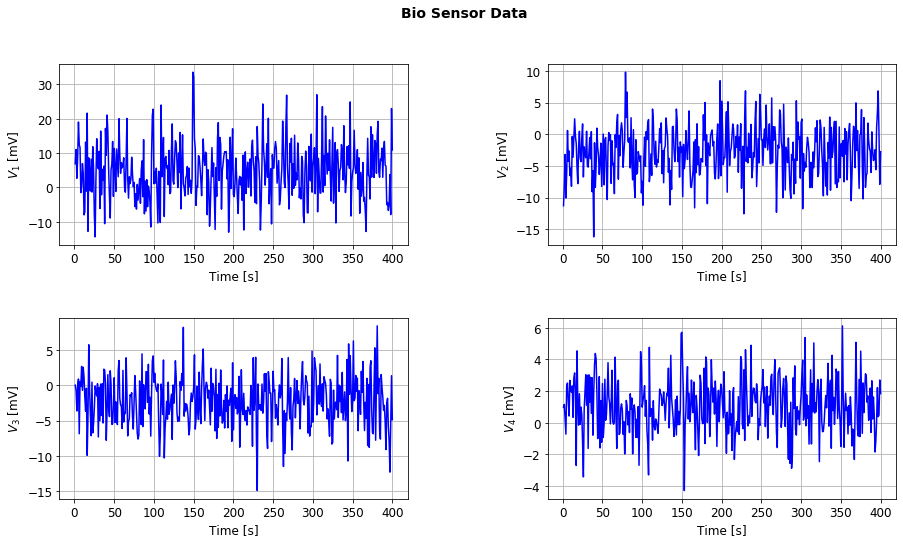

In [14]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

time = np.arange(1, 401)

fig = plt.figure(figsize = (15, 8))
for i in range(4):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.plot(time, bio_data[:, i], color = 'b')
    label = '$V_{}$ [mV]'.format(i + 1)
    ax.set_ylabel(label, fontsize = 12)
    ax.set_xlabel('Time [s]', fontsize = 12)
    ax.xaxis.set_tick_params(labelsize = 12)
    ax.yaxis.set_tick_params(labelsize = 12)
    ax.grid(True)
title  = plt.suptitle('Bio Sensor Data', fontsize = 14, fontweight = 'bold')
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
plt.show()




It is clear from the figure above that the biosensor data take real values, both positives and negatives. The objective here to to model the relation between different channels. Next, We would visualize the data using scatter plots, choosing two channels at a time.  

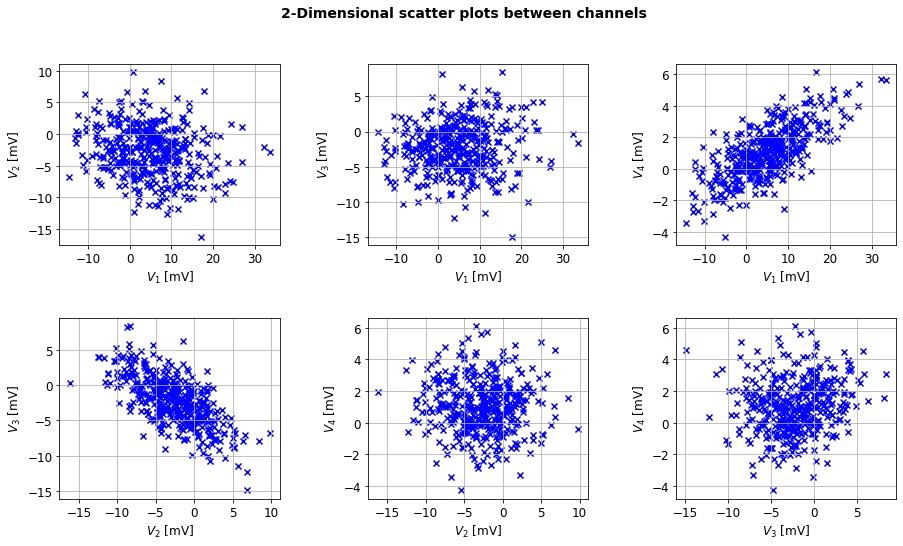

In [15]:
from itertools import combinations

comb = list(combinations([0, 1, 2, 3], 2)) # All bivariate combinations

fig = plt.figure(figsize=[15, 8])

for i in range(6):
    ax = fig.add_subplot(2, 3, i + 1)
    ax.scatter(bio_data[:, comb[i][0]], bio_data[:, comb[i][1]], color = 'b', marker = 'x')
    xlabel = '$V_{}$ [mV]'.format( comb[i][0] + 1)
    ylabel = '$V_{}$ [mV]'.format( comb[i][1] + 1)
    ax.set_ylabel(ylabel, fontsize = 12)
    ax.set_xlabel(xlabel, fontsize = 12)
    ax.xaxis.set_tick_params(labelsize = 12)
    ax.yaxis.set_tick_params(labelsize = 12)
    ax.grid(True)
plt.suptitle('2-Dimensional scatter plots between channels', fontsize = 14, fontweight = 'bold')
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
plt.show()



From the above figure, it looks like that channels $V_1$ and $V_4$ are positively correlated with high correlation and channels $V_2$ and $V_3$ are negatively correlated with high correlation. Later, we will find the covariance and correlation among all the channels.  

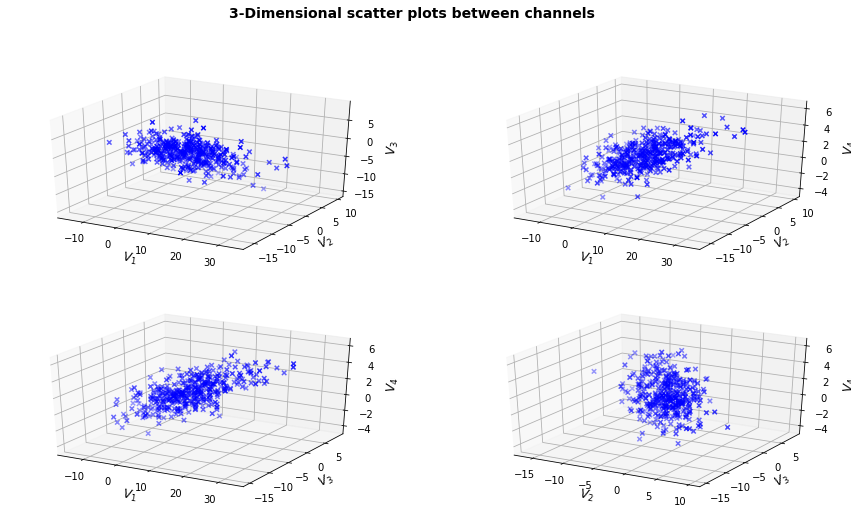

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations

comb_3d = list(combinations([0, 1, 2, 3], 3)) # All trivariate combinations
fig = plt.figure(figsize = (15, 8))
for i in range(4):
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    ax.scatter(bio_data[:, comb_3d[i][0]], bio_data[:, comb_3d[i][1]], bio_data[:, comb_3d[i][2]], color = 'b', marker = 'x')
    x_label, y_label, z_label = '$V_{}$'.format(comb_3d[i][0] + 1), '$V_{}$'.format(comb_3d[i][1] + 1),\
                                '$V_{}$'.format(comb_3d[i][2] + 1)
    ax.set_xlabel(x_label, fontsize = 12)
    ax.set_ylabel(y_label, fontsize = 12)
    ax.set_zlabel(z_label, fontsize = 12)
    
plt.suptitle('3-Dimensional scatter plots between channels', fontsize = 14, fontweight = 'bold')
plt.show()


The above figure shows the scatter plot of channels when three channels are considered at a time. Next we will visualize the data using a histogram.

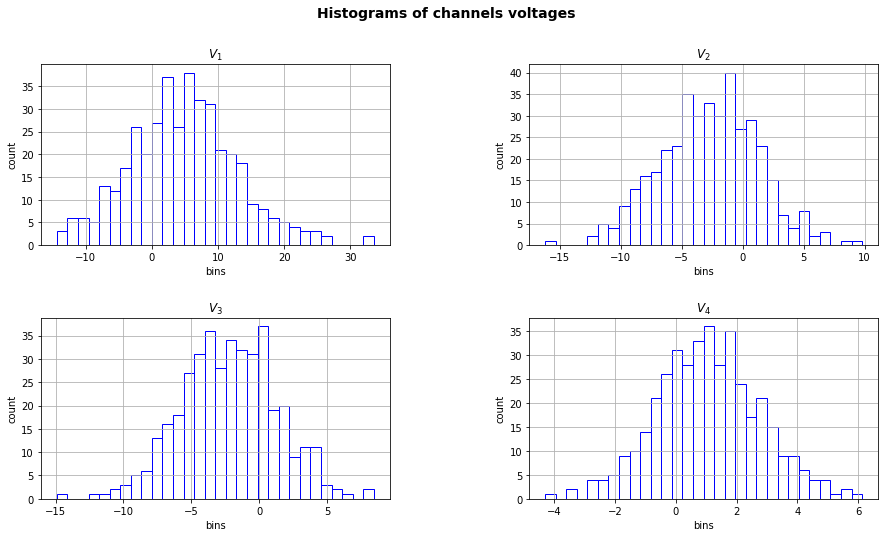

In [17]:
fig = plt.figure(figsize = (15, 8))

for i in range(4):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.hist(bio_data[:, i], bins = 30, color = 'w', edgecolor = 'b')
    ax.set_xlabel('bins')
    ax.set_ylabel('count')
    ax.set_title('$V_{}$'.format(i + 1))
    ax.grid(True)
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
plt.suptitle('Histograms of channels voltages', fontsize = 14, fontweight = 'bold')
plt.show()

### Statistical analysis of the data
Let's now extract some statistical information from the data which will be later useful for the parametric modelling of the data using normal (Gaussian) distribution. We treat the voltage from each channel as a random variable which can take real values. 

To fit Gaussian distribution on some data, two main parameters are required - expected value ($\mu$), and variance ($\sigma^2$) of the data. Let's $X$ be a random variable with possible outcomes of $(x_1, x_2, ..., x_N)$ with probabilities $(p_1, p_2,..., p_N)$, then the expected value ($\mathrm{E}$) and variance ($\sigma^2$) of a random variable is given by 

$$\mathrm{E[X]} = \sum_{i = 1}^{N}p_ix_i$$

$$\sigma^2_X = \mathrm{E[(X-\mathrm{E}(X))^2]}$$

The variance of the random variable is the expected value of squared deviation from expected value of the random variable. Since all the values in each channel are equaly likely to occur, that implies $p_1 = p_2 = ... p_N = \frac{1}{N}$, so the expected value is equal to the mean ($\mu$) of the data. 

$$\mu = \sum_{i = 1}^{N}\frac{x_i}{N}$$

$$\sigma^2 = \sum_{i = 1}^{N}\frac{(x_i - \mu)^2}{N-1}$$




In [18]:
mu = np.sum(bio_data/400, axis = 0) # Mean of the data
var = np.sum((bio_data - mu)**2/399, axis = 0) # Variance of the data
std = np.sqrt(var) # Standard deviation of the data

print('The means of individual channels are: ', mu)
print('The standard deviations of individual channels are', std)
print('The variance of individual channels are', var)



The means of individual channels are:  [ 4.83007267 -2.74287785 -2.23793694  1.05891743]
The standard deviations of individual channels are [8.09103397 3.98633749 3.53122513 1.70250785]
The variance of individual channels are [65.46483076 15.89088662 12.46955089  2.89853299]


Next, let's find the empirical covariances and associated correlation coefficient between channels. The covariance $\sigma_{X,Y}$ between two random variables is given as

$$\sigma_{X,Y} = \mathrm{E}[(X - \mathrm{E}(X))(Y - \mathrm{E}(Y))]$$

So the covariance between two random variables is the expectd value of product of the deviation from their respective individual expected values.

Correlation coefficient $\rho_{X, Y}$ is given by the following expression
$$\rho_{X, Y} = \frac{\sigma_{X, Y}}{\sigma_X\sigma_Y}$$


In [19]:
covar = np.matmul(np.transpose(bio_data - mu), (bio_data - mu))/399 # Covariance matrix
corr = np.divide(covar, np.outer(np.reshape(std, (4, 1)), np.reshape(std, (4, 1)))) # Correlation matrix

print('The covariance matrix of the data is \n\n', covar)
print('\nThe correlation matrix of the data is \n\n', corr)

The covariance matrix of the data is 

 [[65.46483076 -6.49768901  3.11123138  9.71692473]
 [-6.49768901 15.89088662 -9.51371799 -0.27429684]
 [ 3.11123138 -9.51371799 12.46955089  0.86328001]
 [ 9.71692473 -0.27429684  0.86328001  2.89853299]]

The correlation matrix of the data is 

 [[ 1.         -0.20145629  0.10889373  0.70540038]
 [-0.20145629  1.         -0.67585075 -0.0404164 ]
 [ 0.10889373 -0.67585075  1.          0.14359429]
 [ 0.70540038 -0.0404164   0.14359429  1.        ]]


From the above correlation matrix, we can say conclude that there is a high positive correlation between channel 1 and channel 4. Also, there is a high negative correlation between channel 2 and channel 3. These findings agree with the scatter plots.  

### Fit Gaussian and bi-variate Gaussian model to the data

Since, we have determined the parameters required for fitting the Gaussian (normal) distribution on our data. Let's see mathematical model of a Gaussian and bi-variate Gaussian first.

#### Gaussian distribution

The probability density function $p_X$ of a random variable $X$ with Gaussian distribution $N(\mu,\sigma^2)$ is given by the following expression:

$$p_X = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(X- \mu)^2}{2\sigma^2}}$$

#### Bi-variate Gaussian distribution

The joint probability density function $p_{\underline{X}}$ of two random variables $\underline{X} = (X, Y)$ with bi-variate Gaussain distribution $N(\underline{\mu}, \underline{\sum})$ is given by the following formula:

$$\underline{X} = \begin{bmatrix}X \\ Y\end{bmatrix}, \ \underline{\mu} = \begin{bmatrix}\mu_x \\ \mu_y\end{bmatrix}, \ \underline{\sum} = \begin{bmatrix}\sigma^2_X & \rho_{X,Y}\sigma_X\sigma_Y \\ \rho_{X,Y}\sigma_X\sigma_Y  & \sigma^2_Y\end{bmatrix} $$


$$p_{\underline{X}} = \frac{1}{2\pi|\underline{\sum}|^{1/2}}e^{-\frac{1}{2}(\underline{X} - \underline{\mu})^T\underline{\sum}^{-1}(\underline{X} - \underline{\mu})}$$

In [20]:
# This cell evaluate the Gaussian distribution
x = np.empty([1000, 4])
x[:, 0] = np.linspace(-40, 40, 1000)
x[:, 1] = np.linspace(-40, 40, 1000)
x[:, 2] = np.linspace(-40, 40, 1000)
x[:, 3] = np.linspace(-40, 40, 1000)

# Gaussian distribution probabilty density function
gaussian_dist_pdf = (1/np.sqrt((2*np.pi*var)))*np.e**(-(x - mu)**2/(2*var))

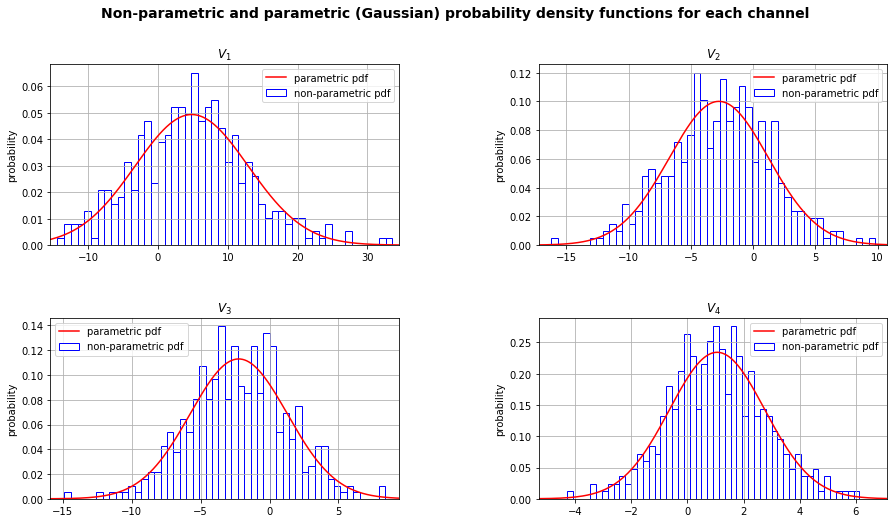

In [21]:
fig = plt.figure(figsize = (15, 8))

for i in range(4):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.hist(bio_data[:, i], bins = 50, color = 'w', edgecolor = 'b', density = True, label = 'non-parametric pdf')
    ax.plot(x[:, i], gaussian_dist_pdf[:, i], label = 'parametric pdf', color = 'r')
    ax.grid(True)
    ax.legend()
    ax.set_title(r'$V_{}$'.format(i + 1))
    xmin, xmax = min(bio_data[:, i]), max(bio_data[:, i])
    ax.set_xlim([xmin - 1, xmax + 1])
    ax.set_ylabel('probability')

plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
plt.suptitle('Non-parametric and parametric (Gaussian) probability density functions for each channel', fontsize = 14,\
            fontweight = 'bold')
plt.show()


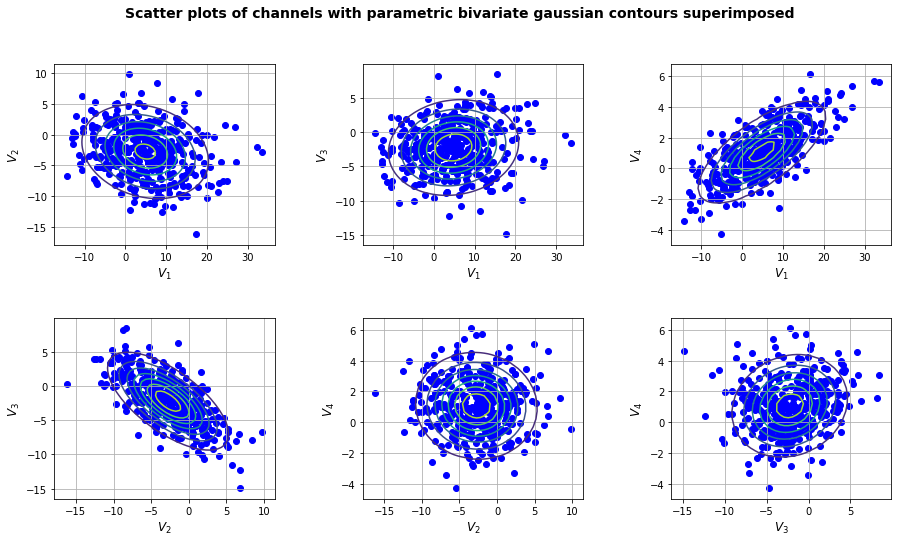

In [22]:
# This cell evaluate the bivariate gaussian distribution

covar_bi = np.empty(shape = (2, 2, 6))
for i in range(6):
    covar_bi[:, :, i] = np.cov(bio_data[:, comb[i][0]], bio_data[:, comb[i][1]])


    
fig = plt.figure(figsize = [15, 8])
for i in range(6):
    mu_bi = [ mu[ comb[i][0] ], mu[ comb[i][1] ] ] 

    mu_bi =np.transpose(np.array(mu_bi))

    xmin = min(bio_data[:, comb[i][0]])
    xmax = max(bio_data[:, comb[i][0]])
    ymin = min(bio_data[:, comb[i][1]])
    ymax = max(bio_data[:, comb[i][1]])

    dh = 0.5
    X = np.arange(xmin, xmax, dh)
    Y = np.arange(ymin, ymax, dh)
    xx, yy = np.meshgrid(X, Y)
    
    # Calculating the bivariate Gaussian function
    const = 1/(2*np.pi)
    sigma = covar_bi[:, :, i]
    const = const/np.sqrt(np.linalg.det(sigma))
    xx_f, yy_f = np.ndarray.flatten(xx), np.ndarray.flatten(yy)
    temp = np.array([xx_f - mu_bi[0], yy_f - mu_bi[1]])
    pdf = const*np.e**(-0.5*np.diag(np.matmul(np.matmul(np.transpose(temp), np.linalg.inv(sigma)),temp)))
    pdf = np.reshape(pdf, newshape = xx.shape) 
    
    # Plotting
    ax = fig.add_subplot(2, 3, i + 1)
    ax.contour(xx,yy,pdf)
    ax.scatter(bio_data[:, comb[i][0]], bio_data[:, comb[i][1]], color = 'b')
    ax.grid(True)
    ax.set_xlabel('$V_{}$'.format(comb[i][0] + 1), fontsize = 12)
    ax.set_ylabel('$V_{}$'.format(comb[i][1] + 1), fontsize = 12)
    
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
plt.suptitle('Scatter plots of channels with parametric bivariate gaussian contours superimposed', fontsize = 14, fontweight = 'bold')
plt.show()



The above figure show the paramaetric Gaussian distribution probability density function fit upon non-parametric (empirical) probability density function of the data. 

### Conditional Dependence Analysis

Let's say we are given value of voltage from one channel and we have to predict the voltage from another channels. 

The conditionals mean $M_{X|Y}$ and variance $\sigma^2_{X|Y}$ of random variable $X$ conditioned on random variable $Y$ is given by

$$M_{X|Y} = M_x + \rho_{XY}\frac{\sigma_X}{\sigma_Y}(Y - M_Y)$$
$$\sigma^2_{X|Y} = \sigma^2_X(1 - \rho^2_{XY})$$



In [23]:
# Example of conditional dependence analysis of V_2 and V_3
mu_23 = np.array([-2.7429, -2.2379]);
sigma_23 = np.array([[15.8909, -9.5137], [-9.5137, 12.4696]])



corr_23 = -0.675850754855383;

stds_23 = [3.98633749464534, 3.53122512626631];
Y = np.arange(-17, 10, 0.01);
mu_2_given_3 = mu_23[0] + corr_23*(stds_23[0]/stds_23[1])*(Y - mu_23[1]);
std_2_given_3 = stds_23[0]*np.sqrt(1 - corr_23**2);
mu_2_given_3_upp_std = mu_2_given_3 + std_2_given_3;
mu_2_given_3_low_std = mu_2_given_3 - std_2_given_3;


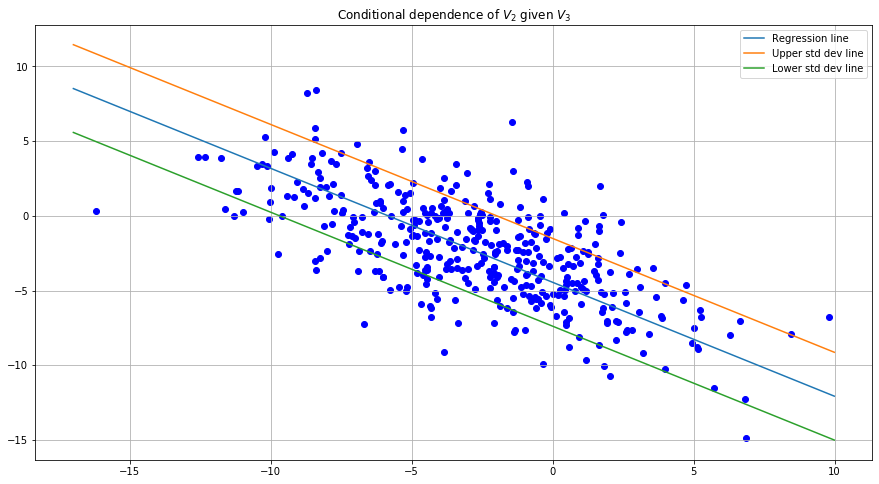

In [24]:
fig = plt.figure(figsize = [15, 8])

ax = fig.add_subplot(111)
ax.scatter(bio_data[:, 1], bio_data[:, 2], color = 'b')
ax.plot(Y, mu_2_given_3, label = 'Regression line')
ax.plot(Y, mu_2_given_3_upp_std, label = 'Upper std dev line');
ax.plot(Y, mu_2_given_3_low_std, label = 'Lower std dev line')
ax.grid(True)
ax.legend()
plt.title('Conditional dependence of'+ r' $V_2$' + ' given $V_3$')
plt.show()